In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Euro 2024 verisi
euro_df = pd.read_csv('/content/drive/MyDrive/DSA210/Euro_2024_Matches.csv')

# Süper Lig verisi
super_lig_df = pd.read_csv('/content/drive/MyDrive/DSA210/2023_2024_super_lig_statistics.csv', sep=';')

# İlk satırlara göz at
print("Euro 2024 Verisi:")
print(euro_df.head())

print("\nSüper Lig Verisi:")
print(super_lig_df.head())


Euro 2024 Verisi:
                 stadium attendance home_team    away_team  home_goals  \
0    Fuball Arena Mnchen     65,052   Germany     Scotland           5   
1        Cologne Stadium     41,676   Hungary  Switzerland           1   
2  Olympiastadion Berlin     68,844     Spain      Croatia           3   
3   BVB Stadion Dortmund     60,512     Italy      Albania           2   
4       Volksparkstadion     48,117    Poland  Netherlands           1   

   away_goals  Home Expected goals(xG)  Home Total shots  \
0           1                     2.15                20   
1           3                     1.25                 6   
2           0                     2.01                11   
3           1                     1.56                17   
4           2                     1.32                12   

   Home Shots on target  Home Big chances  ...  Away Red cards  \
0                    10                 1  ...               1   
1                     2                 3  .

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [6]:
# Gerekli kolonları seç
x = super_lig_df['encounters_in_opponent_box']
y = super_lig_df['expected_goals_xg']


In [7]:
# Pearson korelasyon katsayısını ve p-değerini hesapla
r_value, p_value = pearsonr(x, y)

print(f"📈 Pearson r: {r_value:.2f}")
print(f"📊 p-value: {p_value:.5f}")

# Yorumu da yazalım
if p_value < 0.05:
    print("✅ Sonuç: Anlamlı bir ilişki var (H₀ reddedilir)")
else:
    print("❌ Sonuç: Anlamlı bir ilişki yok (H₀ reddedilemez)")


📈 Pearson r: 0.96
📊 p-value: 0.00000
✅ Sonuç: Anlamlı bir ilişki var (H₀ reddedilir)


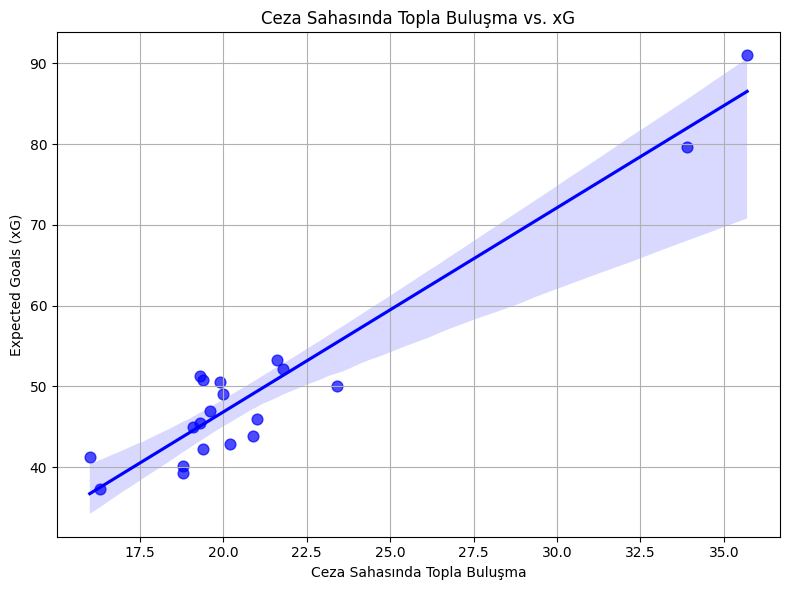

In [8]:
plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, color='blue', scatter_kws={'s': 60, 'alpha': 0.7})
plt.xlabel('Ceza Sahasında Topla Buluşma')
plt.ylabel('Expected Goals (xG)')
plt.title('Ceza Sahasında Topla Buluşma vs. xG')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Home takımlar için DataFrame
home_df = euro_df[['home_team', 'Home Touches in opposition box', 'Home Expected goals (xG)']].copy()
home_df.columns = ['Team', 'box_touches', 'xG']

# Away takımlar için DataFrame
away_df = euro_df[['away_team', 'Away Touches in opposition box', 'Away Expected goals (xG)']].copy()
away_df.columns = ['Team', 'box_touches', 'xG']

# İkisini birleştir
combined_df = pd.concat([home_df, away_df], ignore_index=True)

# İlk 5 satırı kontrol et
combined_df.head()


,Team,box_touches,xG
0,Germany,31,2.15
1,Hungary,10,1.25
2,Spain,21,2.01
3,Italy,34,1.56
4,Poland,17,1.32


In [10]:
from scipy.stats import pearsonr

x = combined_df['box_touches']
y = combined_df['xG']

r_value, p_value = pearsonr(x, y)

print(f"📈 Pearson r: {r_value:.2f}")
print(f"📊 p-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ Anlamlı ilişki var (H₀ reddedilir)")
else:
    print("❌ Anlamlı ilişki yok (H₀ reddedilemez)")


📈 Pearson r: 0.67
📊 p-value: 0.00000
✅ Anlamlı ilişki var (H₀ reddedilir)


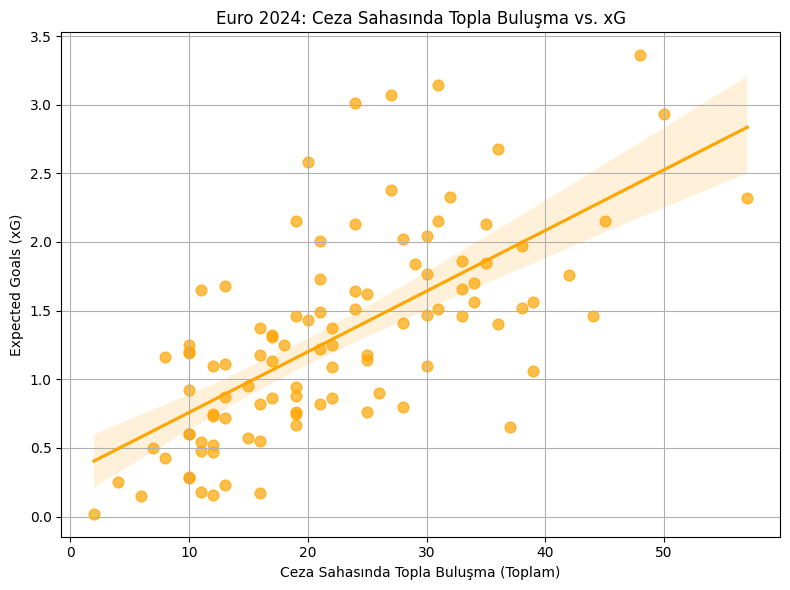

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(x='box_touches', y='xG', data=combined_df, scatter_kws={'s': 60, 'alpha': 0.7}, color='orange')
plt.xlabel('Ceza Sahasında Topla Buluşma (Toplam)')
plt.ylabel('Expected Goals (xG)')
plt.title('Euro 2024: Ceza Sahasında Topla Buluşma vs. xG')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Tüm kolonları küçük harfe çevirip filtrele
for col in euro_df.columns:
    if 'pass' in col.lower():
        print(col)


Home Accurate passes
Home Passes
Home Accurate passes.1
Away Accurate passes
Away Passes
Away Accurate passes.1


In [13]:
## Home verisi
home = euro_df[['home_team',
                'Home Touches in opposition box',
                'Home Expected goals (xG)',
                'Home Accurate passes']].copy()
home.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Away verisi
away = euro_df[['away_team',
                'Away Touches in opposition box',
                'Away Expected goals (xG)',
                'Away Accurate passes']].copy()
away.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Birleştir
combined_df = pd.concat([home, away], ignore_index=True)
combined_df.head()


,Team,box_touches,xG,accurate_passes
0,Germany,31,2.15,643(94%)
1,Hungary,10,1.25,643(94%)
2,Spain,21,2.01,365(83%)
3,Italy,34,1.56,365(83%)
4,Poland,17,1.32,383(84%)


In [14]:
print(combined_df['accurate_passes'].dtype)
print(combined_df['xG'].dtype)

# İlk birkaç değere bak
print(combined_df[['accurate_passes', 'xG']].head())


object
float64
  accurate_passes    xG
0        643(94%)  2.15
1        643(94%)  1.25
2        365(83%)  2.01
3        365(83%)  1.56
4        383(84%)  1.32


In [15]:
# Yeni iki sütun oluşturmak için regex ile ayır
combined_df[['accurate_passes', 'accurate_passes_ratio']] = combined_df['accurate_passes'].astype(str).str.extract(r'(\d+)\((\d+)%\)')

# Sayısal veri tipine çevir
combined_df['accurate_passes'] = combined_df['accurate_passes'].astype(float)
combined_df['accurate_passes_ratio'] = combined_df['accurate_passes_ratio'].astype(float)
combined_df['xG'] = combined_df['xG'].astype(float)



In [16]:
from scipy.stats import pearsonr

# Korelasyon hesapla
r_value, p_value = pearsonr(combined_df['accurate_passes'], combined_df['xG'])

# Sonuçları yazdır
print(f"🧠 Pearson r (xG vs Accurate Passes): {r_value:.2f}")
print(f"📊 p-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ Anlamlı ilişki var (H₀ reddedilir)")
else:
    print("❌ Anlamlı ilişki yok (H₀ reddedilemez)")


🧠 Pearson r (xG vs Accurate Passes): -0.17
📊 p-value: 0.08812
❌ Anlamlı ilişki yok (H₀ reddedilemez)


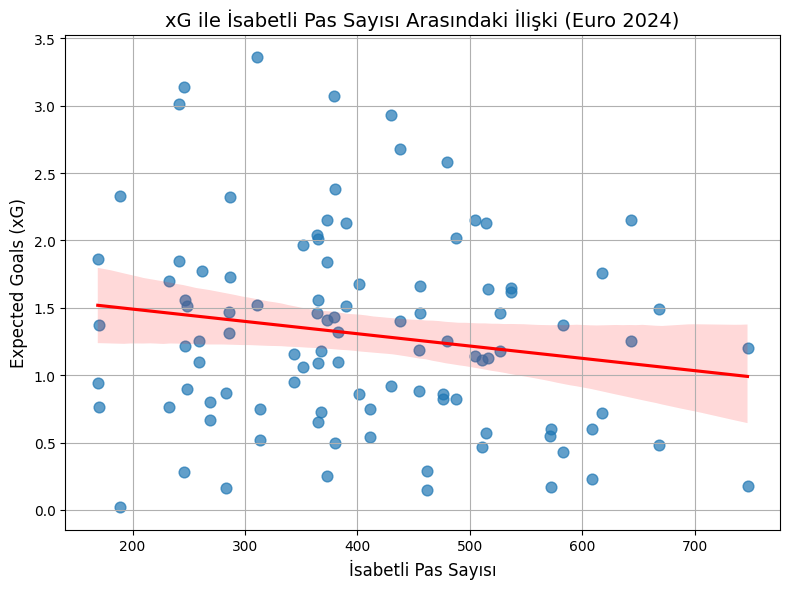

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(
    x='accurate_passes',
    y='xG',
    data=combined_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

plt.xlabel('İsabetli Pas Sayısı', fontsize=12)
plt.ylabel('Expected Goals (xG)', fontsize=12)
plt.title('xG ile İsabetli Pas Sayısı Arasındaki İlişki (Euro 2024)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
print(combined_df[['accurate_passes', 'xG']].describe())
print(combined_df[['accurate_passes', 'xG']].isna().sum())


       accurate_passes          xG
count       102.000000  102.000000
mean        404.892157    1.303235
std         135.337415    0.728759
min         169.000000    0.020000
25%         287.000000    0.760000
50%         381.500000    1.235000
75%         505.000000    1.695000
max         747.000000    3.360000
accurate_passes    0
xG                 0
dtype: int64


In [19]:
# Home takımlar
home = euro_df[['home_team', 'Home Touches in opposition box', 'Home Expected goals (xG)', 'Home Accurate passes']].copy()
home.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Away takımlar
away = euro_df[['away_team', 'Away Touches in opposition box', 'Away Expected goals (xG)', 'Away Accurate passes']].copy()
away.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Birleştir
combined_df = pd.concat([home, away], ignore_index=True)


In [20]:
# accurate_passes kolonunu ikiye ayır: sayı ve yüzde
combined_df[['accurate_passes', 'accurate_passes_ratio']] = combined_df['accurate_passes'].astype(str).str.extract(r'(\d+)\((\d+)%\)')

# Float'a çevir
combined_df['accurate_passes'] = combined_df['accurate_passes'].astype(float)
combined_df['accurate_passes_ratio'] = combined_df['accurate_passes_ratio'].astype(float)


In [21]:
# xG kolonunu düzgün float formata çevir
combined_df['xG'] = combined_df['xG'].astype(str).str.replace(',', '.').str.extract(r'(\d+\.?\d*)')[0]
combined_df['xG'] = combined_df['xG'].astype(float)


In [22]:
r, p = pearsonr(combined_df['accurate_passes'], combined_df['xG'])

print(f"📈 Pearson r: {r:.2f}")
print(f"📊 p-value: {p:.5f}")

if p < 0.05:
    print("✅ Anlamlı ilişki var (H₀ reddedilir)")
else:
    print("❌ Anlamlı ilişki yok (H₀ reddedilemez)")


📈 Pearson r: -0.17
📊 p-value: 0.08812
❌ Anlamlı ilişki yok (H₀ reddedilemez)


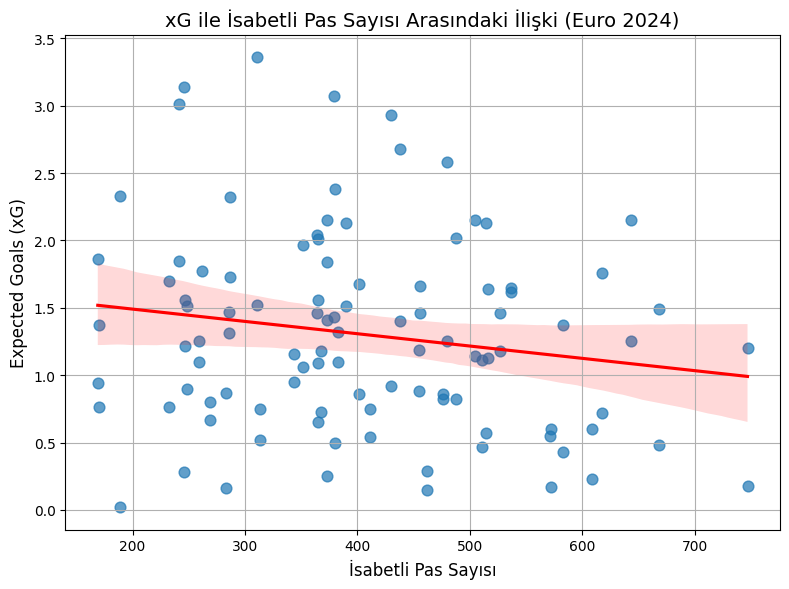

In [23]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='accurate_passes',
    y='xG',
    data=combined_df.dropna(subset=['accurate_passes', 'xG']),
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

plt.xlabel('İsabetli Pas Sayısı', fontsize=12)
plt.ylabel('Expected Goals (xG)', fontsize=12)
plt.title('xG ile İsabetli Pas Sayısı Arasındaki İlişki (Euro 2024)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# Home
home = euro_df[['home_team', 'Home Accurate passes', 'Home Non-penalty xG']].copy()
home.columns = ['Team', 'accurate_passes_raw', 'open_play_xG']

# Away
away = euro_df[['away_team', 'Away Accurate passes', 'Away Non-penalty xG']].copy()
away.columns = ['Team', 'accurate_passes_raw', 'open_play_xG']

# Birleştir
combined_open = pd.concat([home, away], ignore_index=True)


In [27]:
# "643(94%)" → "94"
combined_open['accurate_passes_ratio'] = combined_open['accurate_passes_raw'].astype(str).str.extract(r'\d+\((\d+)%\)')
combined_open['accurate_passes_ratio'] = combined_open['accurate_passes_ratio'].astype(float)


In [28]:
from scipy.stats import pearsonr

r, p = pearsonr(combined_open['accurate_passes_ratio'], combined_open['open_play_xG'])

print(f"📈 Pearson r: {r:.2f}")
print(f"📊 p-value: {p:.5f}")

if p < 0.05:
    print("✅ Anlamlı ilişki var (H₀ reddedilir)")
else:
    print("❌ Anlamlı ilişki yok (H₀ reddedilemez)")


📈 Pearson r: -0.14
📊 p-value: 0.15560
❌ Anlamlı ilişki yok (H₀ reddedilemez)


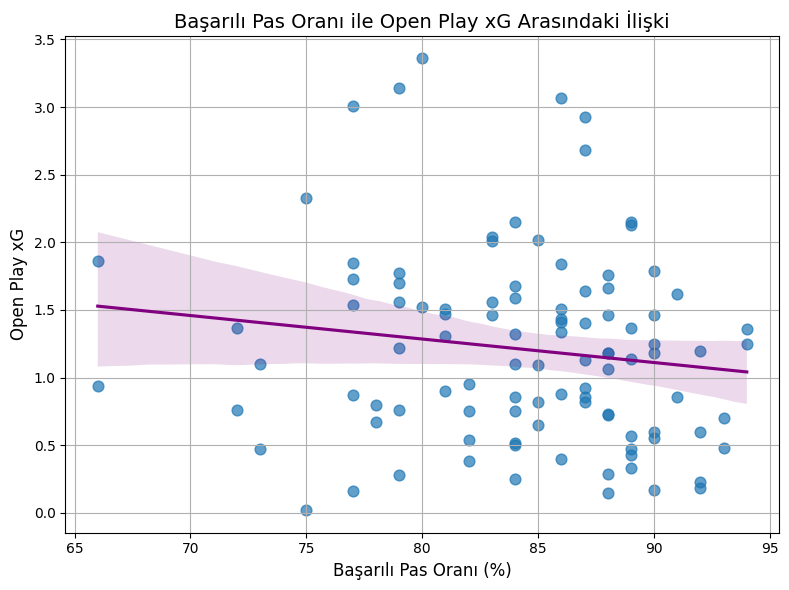

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(
    x='accurate_passes_ratio',
    y='open_play_xG',
    data=combined_open.dropna(),
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'purple'}
)

plt.xlabel('Başarılı Pas Oranı (%)', fontsize=12)
plt.ylabel('Open Play xG', fontsize=12)
plt.title('Başarılı Pas Oranı ile Open Play xG Arasındaki İlişki', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


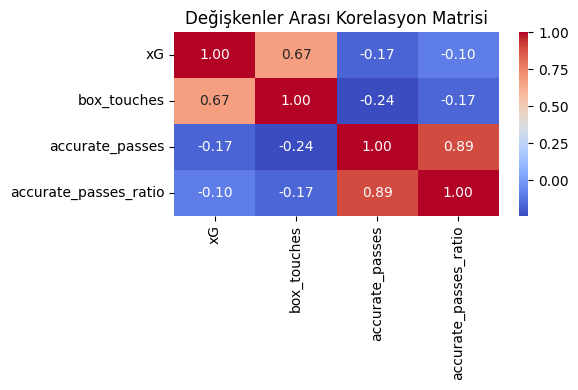

In [30]:
# Korelasyon matrisi için gerekli sayısal kolonları seç
corr_df = combined_df[['xG', 'box_touches', 'accurate_passes', 'accurate_passes_ratio']]
corr = corr_df.corr()

# Görselleştir
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.tight_layout()
plt.show()


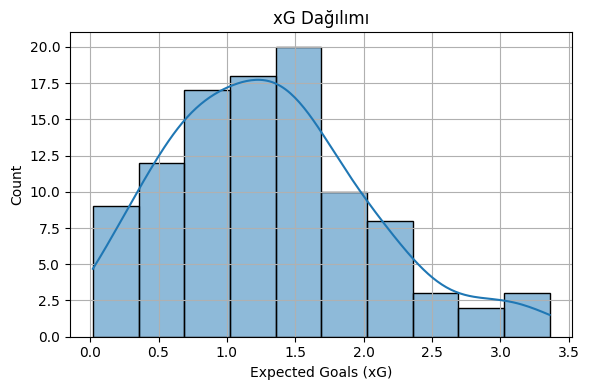

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(combined_df['xG'], bins=10, kde=True)
plt.xlabel('Expected Goals (xG)')
plt.title('xG Dağılımı')
plt.grid(True)
plt.tight_layout()
plt.show()


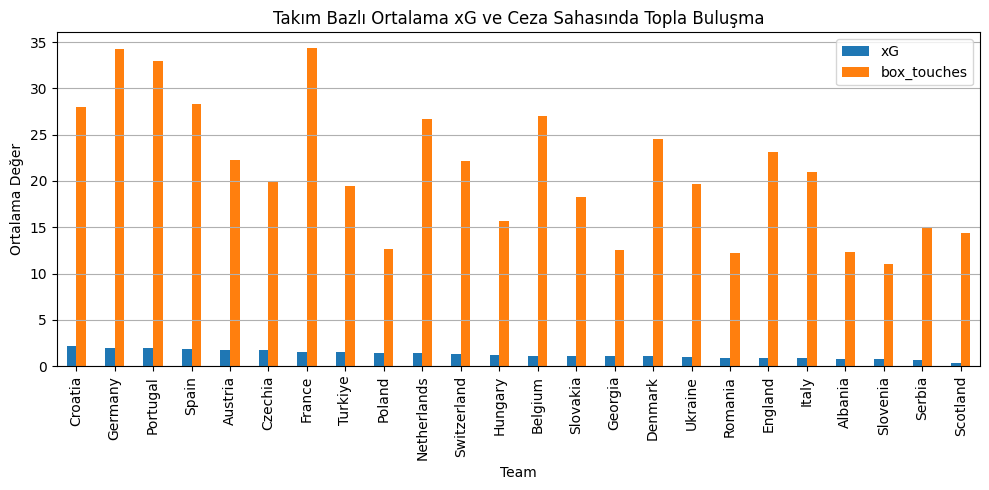

In [32]:
# Takımlara göre ortalama al
team_avg = combined_df.groupby('Team')[['xG', 'box_touches']].mean().sort_values('xG', ascending=False)

# Çiz
team_avg.plot(kind='bar', figsize=(10,5))
plt.title('Takım Bazlı Ortalama xG ve Ceza Sahasında Topla Buluşma')
plt.ylabel('Ortalama Değer')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
